In [10]:
import matplotlib.pyplot as plt
import numpy as np
import time
import math
import matplotlib.pyplot as plt

In [11]:
def trigger_v1(t_axis, signal_0, signal_1, max_size, alarms,delays ,delay_period, threshold, plot_size, trigger_times):
    signal_0 = signal_0[-max_size:]
    signal_1 = signal_1[-max_size:]

    if alarms[0].state==False and signal_0[-1]>threshold:
        alarms[0].set_true()

    elif alarms[0].state==True:
        delays[0].plus_one()
        if delays[0].value > delay_period:
            alarms[0].set_false()
            delays[0].reset()

    if alarms[1].state == False and signal_1[-1] > threshold:
        alarms[1].set_true()

    elif alarms[1].state == True:
        delays[1].plus_one()
        if delays[1].value > delay_period:
            alarms[1].set_false()
            delays[1].reset()


    if alarms[2].state == True:
        delays[2].plus_one()
        if delays[2].value > delay_period:
            delays[2].reset()
            alarms[2].set_false()


    if alarms[0].state * alarms[1].state and alarms[2].state ==False:
        alarms[2].set_true()
        delays[2].plus_one()


    if alarms[2].state==True and delays[2].value==1:
        #print("Trigger!", delay_m.value)
        trigger_time = t_axis[-1] + (plot_size / 2) #this records the times of triggers, and adds half of the plot_size to record the graph and have th triggered signals in the middle
        print("Cond reached!")
        return np.append(trigger_times, trigger_time)
    else:
        return trigger_times


def save_trigger(t_axis, signal_0, signal_1, trigger_times, plot_size, threshold):
    last_time=t_axis[-1]

    if last_time==trigger_times[-1] : #and trigger_times[-1]!=0:
        print("Saved!")
        plt.subplot(2, 1, 1)
        plt.plot(t_axis[-plot_size:], signal_0[-plot_size:])
        plt.title("Random signal and random pulses")
        plt.ylabel("Voltage (mV) \n Channel 1")
        plt.axhline(y=threshold, color='r', lw=1, linestyle='--')
        plt.grid(True, lw=0.5)
        plt.text(1, 1.04, "Trigger \nconfirmed!", transform=plt.gca().transAxes, size=11, ha='right', va='bottom', color="green")



        plt.subplot(2, 1, 2)
        plt.plot(t_axis[-plot_size:], signal_1[-plot_size:])
        plt.xlabel("Time (ns)")
        plt.ylabel("Voltage (mV) \n Channel 2")
        plt.axhline(y=threshold, color='r', lw=1, linestyle='--')
        plt.grid(True, lw=0.5)
        plt.savefig(str(t_axis[-1]))
        plt.show()
    else:
        return None


In [12]:
class random: #class for generating random numbers used as the amplitude of a signal
    def __init__(self, value):
        self.value=np.random.randint(35,150)
    def random(self):
        self.value=np.random.randint(35,150)

class markers: #this class is for counters used in generating the pulses
    def __init__(self, value):
        self.value=0
    def plus_one(self):
        self.value +=1
    def reset(self):
        self.value =0

class conditions(): #This is used for knowing if a pulse is happening and the code will keep generating the pulse if the value is True
    def __init__(self, state):
        self.state=False
    def set_true(self):
        self.state=True
    def set_false(self):
        self.state=False


def triangle_wave(time,amp):
    slope=5

    triangle_at_t= time *slope
    if triangle_at_t>amp:
        triangle_at_t= 2*amp -time*slope
    elif triangle_at_t<0:
        triangle_at_t=0

    return triangle_at_t

def display_stats(signal, t_axis, threshold, plot_size):
    if len(t_axis)%plot_size==0:

        print("plot n°: ", t_axis[-1] // plot_size)
        print("--------------------------------------------------------")

        plt.plot(t_axis[-plot_size:], signal[-plot_size:])
        plt.xlabel("Time (ns)")
        plt.ylabel("Voltage (mV)")
        plt.axhline(y=threshold, color='r', lw=1, linestyle='--')
        plt.grid(True, lw=0.5)
        plt.title("Random signal and random pulses")
        plt.show()

def display_n_plots(t_axis,signals,n,threshold,plot_size):
    if t_axis[-1]%plot_size==0:
        print("plot n°: ", t_axis[-1] // plot_size)
        print("--------------------------------------------------------")
        fig, axs = plt.subplots(4, 4, figsize=(12, 12))  # Adjust the figure size
        y_limits = (-250, 250)
        for i, ax in enumerate(axs.flat):
            ax.plot(t_axis[-plot_size:], signals[i][-plot_size:], label=f'Channel {i + 1}')
            ax.set_title(f'Channel {i + 1}', fontsize=10)
            ax.set_ylim(y_limits)
            ax.grid(True, lw=0.5)
            ax.label_outer()  # Only show outer labels to avoid redundancy
        fig.suptitle('16 Controlled channels', fontsize=22)  # Add a super title
        plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit super title

        """
        plt.subplot(4,4,ns+1)
        plt.plot(t_axis[-plot_size:], signals[ns][-plot_size:])
        plt.axhline(y=threshold, color='r', lw=1, linestyle='--')
        plt.grid(True, lw=0.5)
        """
        plt.savefig(f'Figure {int(t_axis[-1] //200)+1} w 16 Controlled channels')
        plt.show()

def display_2_plots(t_axis, signal_0, signal_1,threshold, plot_size):
    if t_axis[-1]%plot_size==0:

        print("plot n°: ", t_axis[-1] // plot_size)
        print("--------------------------------------------------------")

        plt.subplot(2, 1, 1)
        plt.plot(t_axis[-plot_size:], signal_0[-plot_size:])
        plt.title("Random signal and random pulses")
        plt.ylabel("Voltage (mV) \n Channel 1")
        plt.axhline(y=threshold, color='r', lw=1, linestyle='--')
        plt.grid(True, lw=0.5)

        plt.subplot(2, 1, 2)
        plt.plot(t_axis[-plot_size:], signal_1[-plot_size:])
        plt.xlabel("Time (ns)")
        plt.ylabel("Voltage (mV) \n Channel 2")
        plt.axhline(y=threshold, color='r', lw=1, linestyle='--')
        plt.grid(True, lw=0.5)
        plt.show()


def smart_append(t_axis,array,new_point,max_size):
    if t_axis[-1]<max_size:
        array=np.append(array,new_point)
    else:
        array=np.append(array[1:], new_point)
    return array

def random_generator( mean, std_dev, conds,wave_count,wave_count_1, wave_count_2, amp,amp_1,amp_2, likelihood):

    rand_point = np.random.normal(loc=mean, scale=std_dev) #this generates the background noise
    #rand_point=0

    """These if conditions are repeated 3 times. everytime it checks the "cond_*" condition to choose to generate a pulse"""

    """Pulse number 1 :"""
    if conds[0].state==False:
        signal = 0
        wave_count.reset()
        #amp=250
        if np.random.randint(likelihood*200)==likelihood-1:
            conds[0].set_true()

    else:
        #signal=triangle_wave(wave_count, amp)
        signal=burst_waveform(wave_count.value, amp.value)
        wave_count.plus_one()
        if wave_count.value>99:
            conds[0].set_false()
            amp.random()

    """Pulse number 2 :"""
    if conds[1].state==False:
        signal_1 = 0
        wave_count_1.reset()
        #amp=250
        if np.random.randint(likelihood*200)==likelihood-1:
            conds[1].set_true()

    else:
        #signal=triangle_wave(wave_count, amp)
        signal_1=burst_waveform(wave_count_1.value, amp_1.value)
        wave_count_1.plus_one()
        if wave_count_1.value>99:
            conds[1].set_false()
            amp_1.random()

    """Pulse number 3 :"""
    if conds[2].state == False:
        signal_2 = 0
        wave_count_2.reset()
        # amp=250
        if np.random.randint(likelihood*200)==likelihood-1:
            conds[2].set_true()

    else:
        #signal=triangle_wave(wave_count, amp)
        signal_2=burst_waveform(wave_count_2.value, amp_2.value)
        wave_count_2.plus_one()
        if wave_count_2.value>99:
            conds[2].set_false()
            amp_2.random()

    #This adds the noise to the 3 pulses
    next_point = rand_point + signal +signal_1 +signal_2
    return next_point


def random_generator_n( mean, std_dev, conds,wave_counts, amps, likelihood):

    rand_point = np.random.normal(loc=mean, scale=std_dev) #this generates the background noise
    #rand_point=0

    """These if conditions are repeated 3 times. everytime it checks the "cond_*" condition to choose to generate a pulse"""

    """Pulse number 1 :"""
    if conds[0].state==False:
        signal = 0
        wave_counts[0].reset()
        #amp=250
        if np.random.randint(likelihood*200)==likelihood-1:
            conds[0].set_true()

    else:
        #signal=triangle_wave(wave_count, amp)
        signal=burst_waveform(wave_counts[0].value, amps[0].value)
        wave_counts[0].plus_one()
        if wave_counts[0].value>99:
            conds[0].set_false()
            amps[0].random()

    """Pulse number 2 :"""
    if conds[1].state==False:
        signal_1 = 0
        wave_counts[1].reset()
        #amp=250
        if np.random.randint(likelihood*200)==likelihood-1:
            conds[1].set_true()

    else:
        #signal=triangle_wave(wave_count, amp)
        signal_1=burst_waveform(wave_counts[1].value, amps[1].value)
        wave_counts[1].plus_one()
        if wave_counts[1].value>99:
            conds[1].set_false()
            amps[1].random()

    """Pulse number 3 :"""
    if conds[2].state == False:
        signal_2 = 0
        wave_counts[2].reset()
        # amp=250
        if np.random.randint(likelihood*200)==likelihood-1:
            conds[2].set_true()

    else:
        #signal=triangle_wave(wave_count, amp)
        signal_2=burst_waveform(wave_counts[2].value, amps[2].value)
        wave_counts[2].plus_one()
        if wave_counts[2].value>99:
            conds[2].set_false()
            amps[2].random()

    #This adds the noise to the 3 pulses
    next_point = rand_point + signal +signal_1 +signal_2
    return next_point

In [8]:

def burst_waveform( time, amp ):
    A = amp
    B = 10.0
    C = 10.0
    omega = 1.2
    k = 1.0

    cosine_term   = A * math.cos( omega * time )      # oscillation
    heaviside_term = 1 / (1 + math.exp( -2*k*time ) ) # turn-on (heaviside step function parameterized)
    exponent_term = math.exp( -(time - B)/C )         # attenuation

    voltage = cosine_term * heaviside_term * exponent_term
    return voltage

def triangle_wave(time,amp):
    slope=1

    triangle_at_t= time *slope
    if triangle_at_t>amp:
        triangle_at_t= 2*amp -time*slope
    elif triangle_at_t<0:
        triangle_at_t=0

    return triangle_at_t

plot n°:  1
--------------------------------------------------------


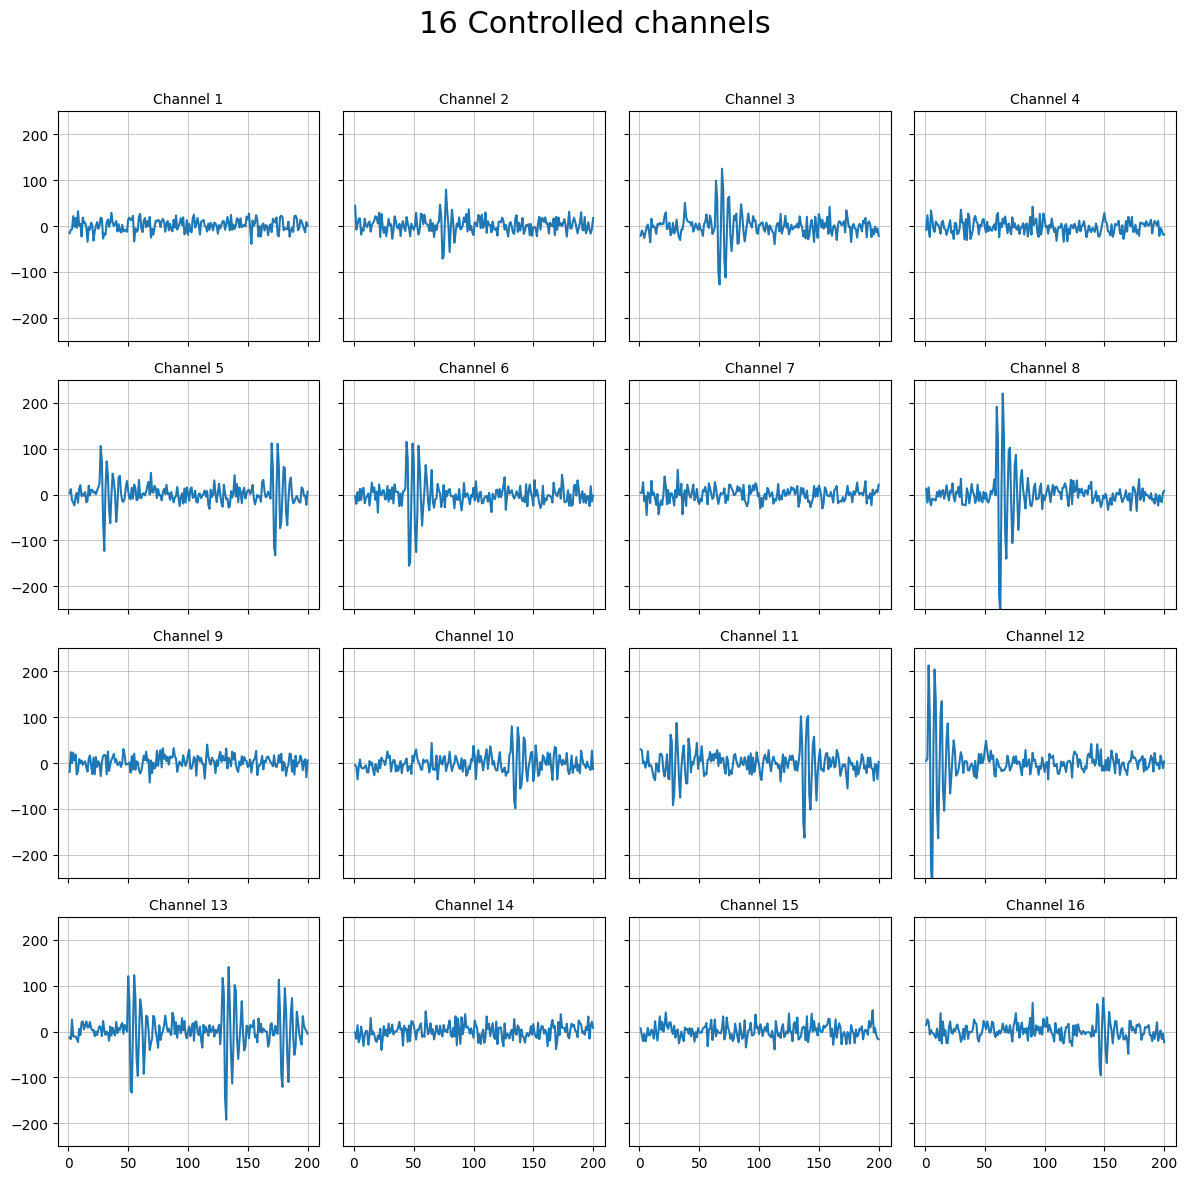

plot n°:  2
--------------------------------------------------------


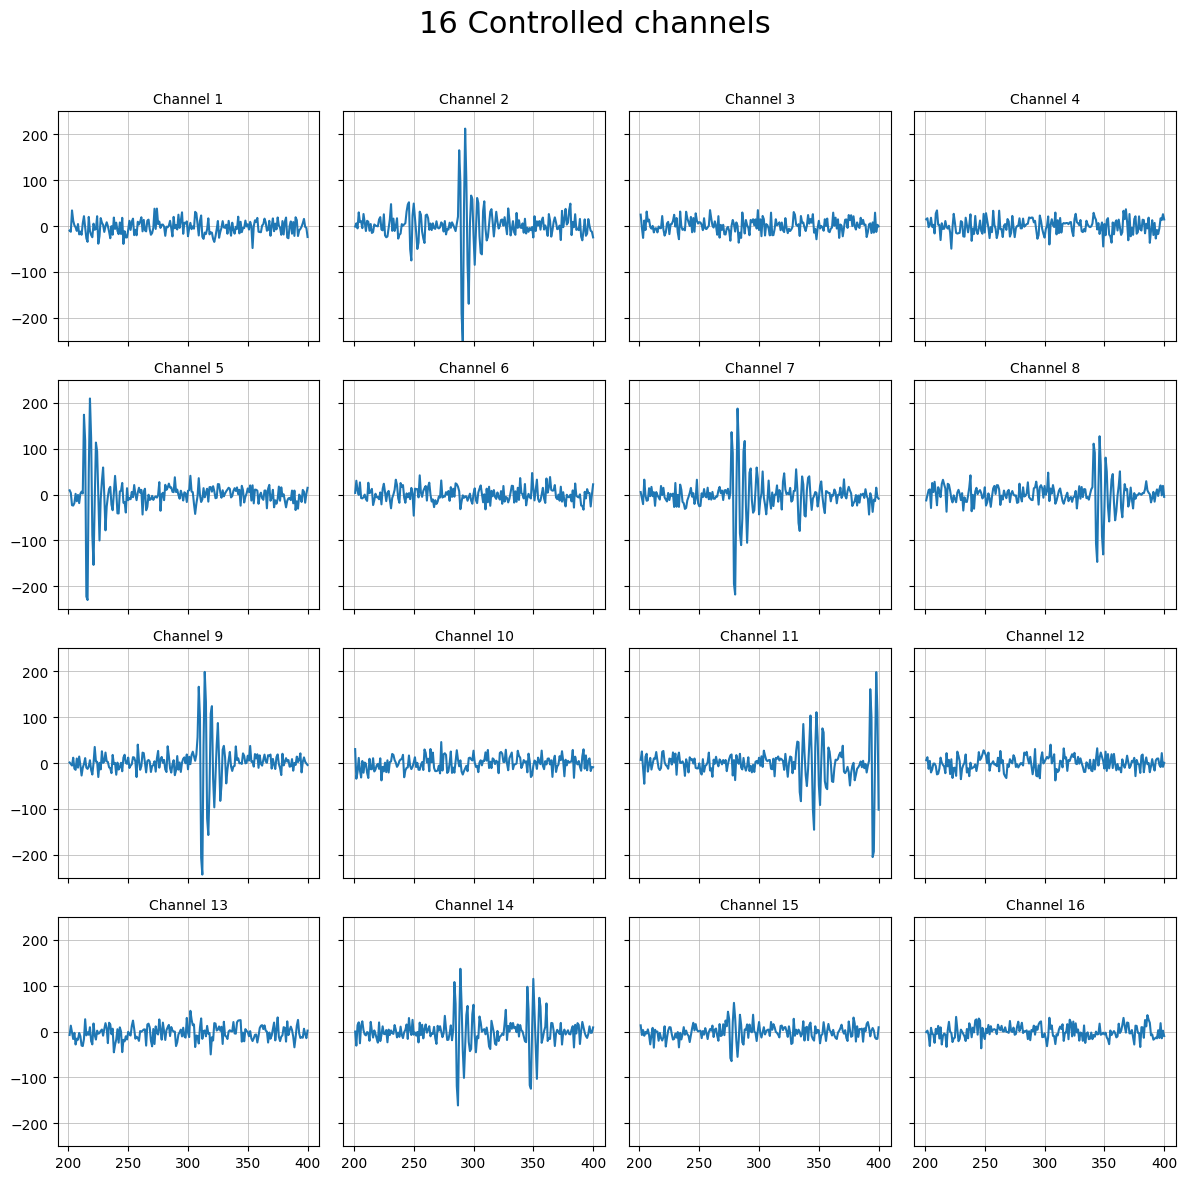

plot n°:  3
--------------------------------------------------------


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fb3cc845510> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [9]:

#these are values used to generate noise
mean = 0
std_dev = 15

threshold = 75
delay_period= 30 #the delay of time to wait when a threshold is exceeded


t_axis = np.array([0])
trigger_times=np.array([0])

likelihood= 3 #probability of occurance of random pulses (Higher makes it less probable, 3 is around 1 occurance per 3 cycles)
plot_size= 200 #Data points in one plot
max_size= 1000 #the maximum number of points in the signal arrays kept at any time (this includes t_axis) (to protect the RAM)
n_of_plots=16

amps,wave_counts, conds=[], [],[]

for i in range(n_of_plots):
    amps.append([random(np.random.randint(35,150)),random(np.random.randint(35,150)),random(np.random.randint(35,150))] )
    wave_counts.append([markers(0),markers(0),markers(0)])
    conds.append([conditions(False),conditions(False),conditions(False)])

signals=[]

for i in range(n_of_plots):
    signals.append(np.array([0]))

#for the trigger system
alarm_0, alarm_1, alarm_m = conditions(False), conditions(False), conditions(False)
delay_0, delay_1, delay_m = markers(0), markers(0), markers(0)

while True:
    t_axis= smart_append(t_axis, t_axis, t_axis[-1]+1, max_size-1) #adds +1 to time each cycle, and limits the len(t_axis) to max_size

    for n in range(n_of_plots):
        Information = random_generator_n(mean, std_dev, conds[n], wave_counts[n], amps[n], likelihood)
        signals[n] = smart_append(t_axis, signals[n], Information, max_size)



    display_n_plots(t_axis, signals, n_of_plots, threshold, plot_size)
    #display_2_plots(t_axis, signal_0, signal_1, threshold, plot_size)

    #trigger_times=trigger_v1(t_axis, signal_0, signal_1, max_size, alarms,delays, delay_period, threshold, plot_size, trigger_times)
    #save_trigger(t_axis, signal_0, signal_1, trigger_times, plot_size, threshold)

    time.sleep(0.000001)


